# hot-CNO and breakout

We want to explore how the CNO cycle changes as temperature increases and the proton capture rates start becoming much faster.  We'll see that eventually we are limited by $\beta$-decays.

In [1]:
import pynucastro as pyna

This collection of rates has the main CNO rates plus a breakout rate into the hot CNO cycle(s)

In [2]:
rl = pyna.ReacLibLibrary()

We'll get all the rates linking the core nuclei in CNO and the various hot-CNO cycles, but we'll explicitly remove $3$-$\alpha$, since it is not strong at the temperatures where CNO operates.

In [3]:
linking_nuclei = ["p", "he4",
                  "c12", "c13",
                  "n13", "n14", "n15",
                  "o14", "o15",]
lib = rl.linking_nuclei(linking_nuclei, with_reverse=False)
r3a = lib.get_rate_by_name("he4(aa,g)c12")
lib.remove_rate(r3a)

In [4]:
rc = pyna.RateCollection(libraries=lib)

To evaluate the rates, we need a composition.  This is defined using a list of `Nucleus` objects.
Here we set H and He to approximate their solar values and distribute the remaining mass evenly
across the other nuclei.

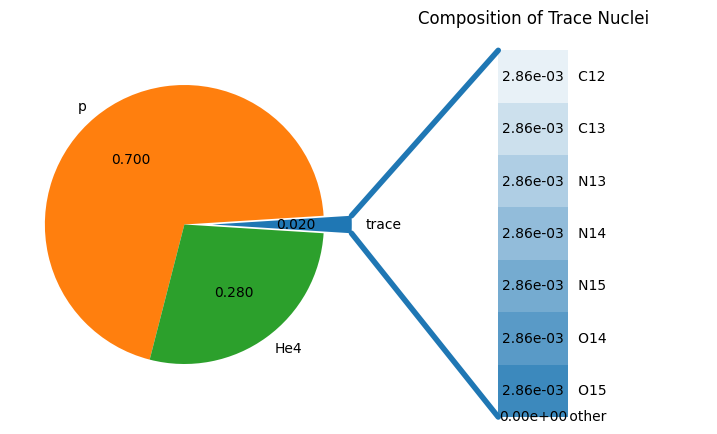

In [5]:
comp = pyna.Composition(rc.get_nuclei())
comp.set_solar_like()
fig = comp.plot()

## Transition from CNO to hot-CNO

Let's look at the CNO cycle at a temperature and density just a bit hotter than the Sun's core

In [6]:
T = 2.e7
rho = 200

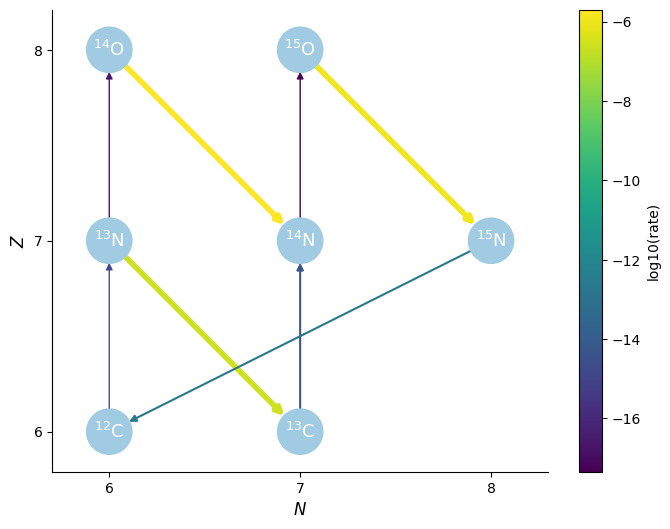

In [7]:
fig = rc.plot(rho=rho, T=T, comp=comp, ydot_cutoff_value=1.e-20)

Starting at ${}^{12}\mathrm{C}$, we see the following sequence dominate:

* We capture a proton to make ${}^{13}\mathrm{N}$
* ${}^{13}\mathrm{N}$ almost immediately beta decays to ${}^{13}\mathrm{C}$, since the beta-decay rate is so much faster than a proton capture on ${}^{13}\mathrm{N}$.
* We continue with proton captures, making ${}^{14}\mathrm{N}$ and then ${}^{15}\mathrm{O}$
* ${}^{15}\mathrm{O}$ then beta-decays to get ${}^{15}\mathrm{N}$
* Finally, one last proton capture, doing ${}^{15}\mathrm{N}(p,\alpha){}^{12}\mathrm{C}$, getting us back to where we started.

This is the basic CNO cycle

Now let's make it a bit hotter

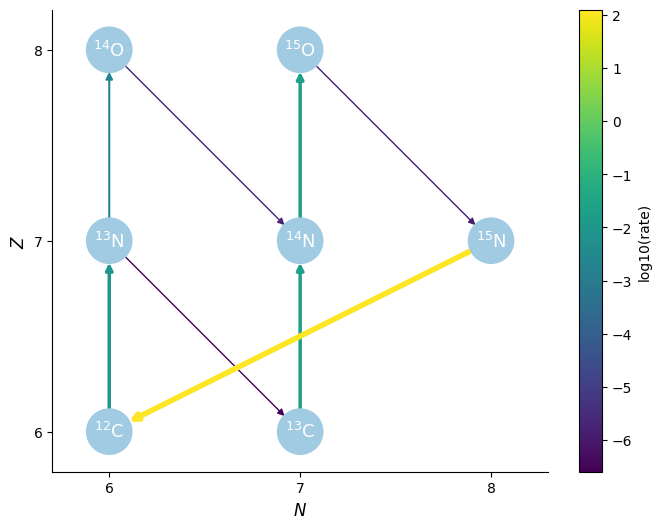

In [8]:
T = 3.e8
fig = rc.plot(rho=rho, T=T, comp=comp, ydot_cutoff_value=1.e-20)

Now we see that the proton capture on ${}^{13}\mathrm{N}$ is faster than the beta-decay, and we make ${}^{14}\mathrm{O}$.  Then the cycle continues as before.

As we increase the temperature and density further, we see that the beta decays become the rate-limiting steps.

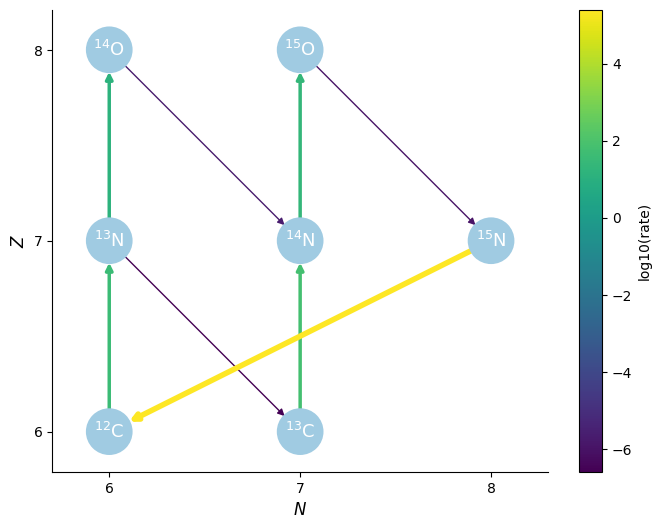

In [9]:
T = 5.e8
rho = 1.e4
fig = rc.plot(rho=rho, T=T, comp=comp, ydot_cutoff_value=1.e-20)

Since the beta-decays are temperature independent (you just have to wait for the nucleus to decay), the overall hot-CNO rate becomes insensitive to temperature.

## When does hot-CNO set in?

We can look at the temperature where we cross from CNO to hot-CNO by looking at the rates involving ${}^{13}\mathrm{N}$

In [10]:
r1 = rl.get_rate_by_name("n13(p,g)o14")
r2 = rl.get_rate_by_name("n13(,)c13")

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Sample the rates at a range of temperatures

In [12]:
T = np.logspace(7.5, 8.5, 100)

rate_p_capture = [r1.eval(temp) for temp in T]
rate_beta_decay = [r2.eval(temp) for temp in T]

Text(0, 0.5, '$N_A \\langle\\sigma v\\rangle$')

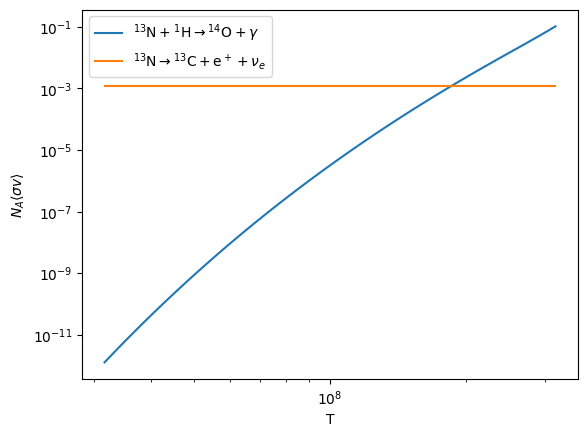

In [13]:
fig, ax = plt.subplots()
ax.loglog(T, rate_p_capture, label=f"{r1.pretty_string}")
ax.loglog(T, rate_beta_decay, label=f"{r2.pretty_string}")
ax.legend()
ax.set_xlabel("T")
ax.set_ylabel(r"$N_A \langle\sigma v\rangle$")

We see that above $T \sim 2\times 10^8~\mathrm{K}$, the proton-capture proceeds faster than the beta-decay, and we transition to hot-CNO.